In [12]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

In [13]:
# Functions for perceptron
def perceptron(x, w):
    ws = sum(x * w)
    yt = 0
    if ws < 0:
        yt = -1
    elif ws > 0:
        yt = 1

    return yt

def perceptron_mult(x, w):
    yp = []
    for xi in x:
        yp.append(perceptron(xi, w))

    return np.array(yp)

In [14]:
# Method of gradient 
def train_perceptron_sg(x, y, x_test = None, y_test = None, n_epochs = 20, alpha = 0.001):
    n = x.shape[0]
    n_features = x.shape[1]

    # Random initializacion
    w = 2 * np.random.rand(n_features) - 1

    # Calculate model
    epoch_acc = []
    for epoch in range(n_epochs):
        # Random indices
        indices = np.random.permutation(n)
        for index in indices:
            # Evaluate perceptron
            yp = perceptron(x[index, :], w)

            # Update weights
            w = w + alpha * (y[index] - yp) * x[index, :]
    
        # Evaluate performance
        if x_test is not None and y_test is not None:
            y_test_pred = perceptron_mult(x_test, w)
            acc = accuracy_score(y_test, y_test_pred)
            epoch_acc.append(acc)

    # Return model and accuracy
    if x_test is not None and y_test is not None:
        epoch_acc = np.array(epoch_acc)
        return {'w':w, 'acc':epoch_acc[-1], 'epoch_acc': epoch_acc}
    
    return {'w':w}

In [15]:
# Preparing data
data = np.loadtxt(r'\Users\alana\Documents\TecMTY\RoboticaInteligente\DeepLearning\red_neronal\mist_data\misterious_data_1.txt')
x = data[:,1:]
y = data[:,0]

n = x.shape[0]
nf = x.shape[1]

# Preparing data
x = np.hstack((x, np.ones((n, 1))))
y[y==1] = -1
y[y==2] = 1

# Using Stochastis gradient 
n_epochs = 100
alpha = 0.001

model = train_perceptron_sg(x, y, x_test = x, y_test = y, n_epochs = n_epochs, alpha = alpha)

ACC:  0.7648766328011611


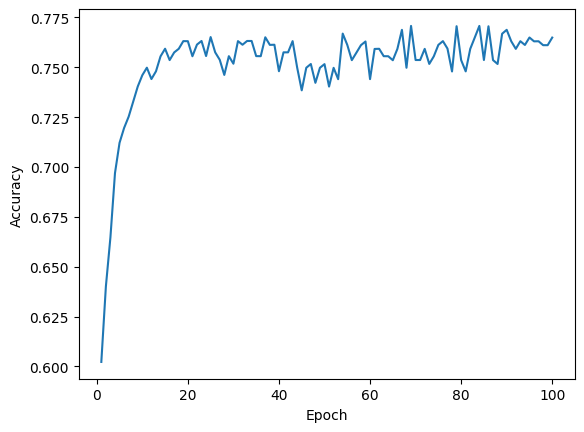

In [16]:
# Evaluate Stochastic Gradient using cross validation
nk = 10
kf = StratifiedKFold(n_splits=nk, shuffle=True)

acc = 0
epoch_acc = np.zeros(n_epochs)

for train_index, test_index in kf.split(x,y):
    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    # Train perceptron
    model = train_perceptron_sg(x_train, y_train, x_test = x_test, y_test= y_test, n_epochs= n_epochs, alpha= alpha)
    acc += model['acc']
    epoch_acc += model['epoch_acc']

acc /= nk
epoch_acc /= nk
print('ACC: ', acc)

plt.plot(np.arange(1, n_epochs + 1, 1), epoch_acc)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

Evaluando con datos que tienen 4 clases

In [17]:
# Preparing data
data_four = np.loadtxt(r'\Users\alana\Documents\TecMTY\RoboticaInteligente\DeepLearning\red_neronal\mist_data\misterious_data_1.txt')
x = data[:,1:]
y = data[:,0]

n = x.shape[0]
nf = x.shape[1]

# Preparing data
x = np.hstack((x, np.ones((n, 1))))
y[y==1] = -1
y[y==2] = 1

# Using Stochastis gradient 
n_epochs = 100
alpha = 0.001

model = train_perceptron_sg(x, y, x_test = x, y_test = y, n_epochs = n_epochs, alpha = alpha)

ACC:  0.9185050798258347


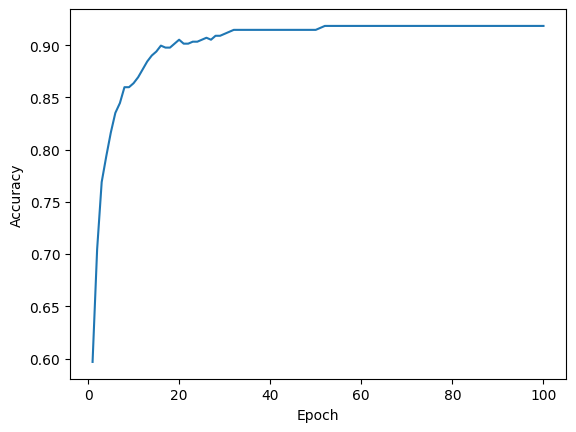

In [18]:
# Evaluate Stochastic Gradient using cross validation
nk = 10
kf = StratifiedKFold(n_splits=nk, shuffle=True)

acc = 0
epoch_acc = np.zeros(n_epochs)

for train_index, test_index in kf.split(x,y):
    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    # Train perceptron
    model = train_perceptron_sg(x_train, y_train, x_test = x_test, y_test= y_test, n_epochs= n_epochs, alpha= alpha)
    acc += model['acc']
    epoch_acc += model['epoch_acc']

acc /= nk
epoch_acc /= nk
print('ACC: ', acc)

plt.plot(np.arange(1, n_epochs + 1, 1), epoch_acc)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()